# Анализ рынка видео игр

**Задача:**  
Для интернет-магазина компьютерных игр необходимо провести анализ рынка, выявить определяющие успешность игр закономерности, определить портрет пользователя для каждого из регионов, проверить рабочие гипотезы. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании, помочь развитию бизнеса магазина.    


Данные собраны из открытых источников и записаны в файл *games.csv*. Данные включают в себя информацию за период с 1983 по 2016 годы. Данные за 2016 год могут быть неполными.

**Описание данных *games.csv*:**
* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы долларов)
* EU_sales — продажи в Европе (миллионы долларов)
* JP_sales — продажи в Японии (миллионы долларов)
* Other_sales — продажи в других странах (миллионы долларов)
* Critic_Score — оценка критиков (от 0 до 100)
* User_Score — оценка пользователей (от 0 до 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Этапы выполнения проекта
[1. Получение данных](#Этап-1.-Получение-данных)  
[2. Предобработка данных](#Этап-2.-Предобработка-данных)  
[3. Исследовательский анализ данных](#Этап-3.-Исследовательский-анализ-данных)  
[4. Портрет пользователя каждого региона](#Этап-4.-Портрет-пользователя-каждого-региона)  
[5. Исследование статистических показателей](#Этап-5.-Исследование-статистических-показателей)  
[6. Проверка гипотез](#Этап-6.-Проверка-гипотез)  
[7. Результаты исследования](#Этап-7.-Результаты-исследования)  

## Этап 1. Получение данных

Изучим данные, предоставленные для проекта.

In [1]:
# импорт библиотек
import pandas as pd
import numpy as np
from scipy import stats as st
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Прочитаем файл games.csv и сохраним его в переменной df. 

In [2]:
# чтение файла с данными с сохранением в df
df = pd.read_csv('/datasets/games.csv')

Получение первых 10 строк таблицы.

In [3]:
# получение первых 10 строк таблицы.
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Общая информация о данных таблицы df.

In [4]:
# получение общей информации о данных в таблице df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Рассмотрим полученную информацию подробнее.

Всего в таблице 11 столбцов. Присутствуют два типа данных: non-null object (5 столбцов) и non-null float64 (6 столбцов).

Подробно разберём, какие в df столбцы и какую информацию они содержат:
* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы долларов)
* EU_sales — продажи в Европе (миллионы долларов)
* JP_sales — продажи в Японии (миллионы долларов)
* Other_sales — продажи в других странах (миллионы долларов)
* Critic_Score — оценка критиков (от 0 до 100)
* User_Score — оценка пользователей (от 0 до 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Количество значений в столбцах различается. Это говорит о том, что в данных есть пропущенные значения.


**Выводы**

Каждая строка таблицы содержит исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation), год выпуска и присвоенный возрастной рейтинг.

Две проблемы, которые нужно решать на следующем этапе: пропуски и некачественные названия столбцов. 

Для проверки рабочих гипотез особенно ценны столбцы Genre, Platform, Year_of_Release и разбивка продаж по регионам. По ним мы сможем отследить, как менялись предпочтения пользователей со времением, составить портрет пользователя каждого региона. Столбцы Critic_Score, User_Score, Rating помогут проверить гипотезы о влиянии рейтинга игр на продажи в зависимости от жанра и платформы выхода игр.

## Этап 2. Предобработка данных

Заменим названия столбцов, преобразуем данные в нужные типы, обработаем пропуски (с заполнением, где возможно), проверим данные на наличие дубликатов, а также посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

Получаем перечень названий столбцов.

In [5]:
# перечень названий столбцов таблицы df
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

Названия столбцов с заглавной буквы, что не совсем удобно для доступа к данным. Переименуем столбцы для удобства дальнейшей работы. Проверим результат.

In [6]:
# переименование столбцов
df = df.rename(columns=lambda x: x.lower())

In [7]:
# проверка результатов - перечень названий столбцов
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Необходимо установить наличие дубликатов. Если найдутся, удаляем, и проверяем, все ли удалились.

In [8]:
# получение суммарного количества дубликатов в таблице df
df.duplicated().sum()

0

Дубликатов не обнаружено. Займемся пропущенными значениями.

Проверим данные на наличие пропусков вызовом набора методов для суммирования пропущенных значений.

In [9]:
# суммарное количество пропусков в таблице df
df.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

**Обработка пропусков данных в столбце 'name'**

Сперва посмотрим на строки с пропусками данных в столбце name.

In [10]:
# отбираем строки с пропусками данных в столбце name
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Таких строк всего две. Более того данные строки содержат пропуски в других столбцах (genre, critic_score, user_score, rating) и относятся к играм 1993 года выпуска на платформе GEN. Таким образом, эти строки будем считать не релевантными и не способными существенно повлиять на результаты проводимого анализа, поэтому удалим данные строки.

In [11]:
# удаляем строки с пропусками данных в столбце name 
# делаем сброс индексов
df = df.dropna(subset=['name']).reset_index(drop=True)

In [12]:
# проверяем суммарное количество пропусков в таблице df
df.isnull().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

Пропуски данных в столбце name теперь отсутствуют

**Обработка пропусков данных в столбце 'year_of_release'**

Посмотрим на пропуски данных в столбце year_of_release 	

In [13]:
# отбираем строки с пропусками данных в столбце year_of_release 
df[df['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16371,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16403,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16446,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16456,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


У нас нет данных о годе выпуска 269 игр.   
Заметим, что у части строк в названии игры присутствует год выпуска. Его можно использовать в качестве замены пропущенных данных для столбца year_of_release 

Произведем поиск таких строк и создадим словарь, где в качестве ключа будет индекс строки в которой год выпуска присутствует в самом названии игры, а в качестве значения будет сам год выпуска.

In [14]:
idx_year = {}  # создаем пустой словарь

# итерируемся по строкам с отсутствием информации о годе
for row in df[df['year_of_release'].isna()].itertuples():
    for item in row.name.split(' '):  # разделяем название игры на отдельные слова
        if item == row.name.split(' ')[-1]:  # берем последнее слово из списка
            try:  # если последнее слово является числом то
                if len(item) == 2 or len(item) == 4: # проверяем его "длину"
                    item = int(item)  # преобразовываем тип данных
                    if item < 21:  # приводим года этого века к полной дате
                        item += 2000
                    elif item > 80 and item < 100: # приводим года прошлого века к полной дате
                        item += 1900
                    if item >= 1980:  # 1980 -- минимальное значение года в наших данных
                        idx_year[row.Index] = item
            except:  # если последнее слово не является числом то продолжаем итерировать по строкам
                continue
            
            
# проверяем выводом на экран получившийся словарь
for key, value in idx_year.items():
    print(f'index: {key: <5} | year:{value: >5}')

index: 183   | year: 2004
index: 377   | year: 2004
index: 475   | year: 2006
index: 1300  | year: 1999
index: 1649  | year: 2003
index: 2478  | year: 2007
index: 2848  | year: 2011
index: 3412  | year: 2006
index: 3485  | year: 2002
index: 4204  | year: 2007
index: 4774  | year: 2003
index: 5155  | year: 2003
index: 5654  | year: 2005
index: 5888  | year: 2003
index: 8917  | year: 2005
index: 13194 | year: 2011
index: 13928 | year: 2006
index: 15951 | year: 2008
index: 16077 | year: 2007
index: 16371 | year: 2008


Производим замену отсутствующих значений на полученные из названий игр года.

In [15]:
# итерирумся по словарю и производим замену
for key, v in idx_year.items():
    df.loc[key, 'year_of_release'] = v

Проверим данные на замены, выполненные на предыдущем шаге.

In [16]:
# отбираем строки с пропусками данных в столбце year_of_release 
df[df['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
677,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
...,...,...,...,...,...,...,...,...,...,...,...
16346,Agarest Senki: Re-appearance,PS3,NaN,Role-Playing,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16403,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16446,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16456,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Теперь у нас нет данных о годе выпуска 249 игр. Это меньше, чем после предудущей проверки, значит замены были выполнены успешно.  
Найти года релиза игр для оставшихся 249 строк, возможно, получится с помощью парсинга страниц в интернете, но на данном этапе посчитаем возможным просто избавиться от этих строк и продолжить работу с имеющимся датасетом. т.к. 249 строк составляет всего порядка 1.49% от общего количества данных, что не должно в значительной степени сказаться на результатах исследования. Если же на каком-то этапе мы поймем, что данных нам будет не хватать, то мы вернемся к вопросу парсинга страниц в интернете для поиска недостающей информации.

In [17]:
# удаляем строки с пропусками данных в столбце year_of_release 
# делаем сброс индексов
df = df.dropna(subset=['year_of_release']).reset_index(drop=True)

In [18]:
# проверяем суммарное количество пропусков в таблице df
df.isnull().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8466
user_score         6610
rating             6682
dtype: int64

Пропуски данных в столбце year_of_release теперь отсутствуют

**Обработка пропусков данных в столбце 'critic_score'**

Посмотрим на пропуски данных в столбце critic_score

In [19]:
# отбираем строки с пропусками данных в столбце critic_score
df[df['critic_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16459,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16460,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16461,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16462,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


У нас нет данных об оценке критиков для 8466 игр, что составляет порядка 51% игр.

Попробуем найти корреляцию в имеющихся данных между оценками критиков и:
* годом выхода игры (вдруг в какие-то годы критики были более благосклонны?)
* продажами в Северной Америке (na_sales)
* продажами в Европе (eu_sales)
* продажами в Японии (jp_sales)
* продажами в остальных регионах (other_sales)
* общими продажами по всему миру (global_sales)

Находим коэффициент корреляции Пирсона (год выпуска игры VS оценка критиков)

In [20]:
df['year_of_release'].corr(df['critic_score'])

0.010353467558889768

Корреляция очень слабая. Практически полное ее отсутствие.

Подсчитаем общие продажи для каждой из игр по всему миру (создадим новый столбец global_sales)

In [21]:
# суммируем продажи по регионам в новый столбец global_sales
df['global_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,global_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16459,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16460,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16461,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16462,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


Находим коэффициент корреляции Пирсона (продажи в Северной Америке VS оценка критиков)

In [22]:
df['na_sales'].corr(df['critic_score'])

0.24081751449345798

Корреляция слабая

Находим коэффициент корреляции Пирсона (продажи в Европе VS оценка критиков)

In [23]:
df['eu_sales'].corr(df['critic_score'])

0.22133464515023293

Корреляция слабая

Находим коэффициент корреляции Пирсона (продажи в Японии VS оценка критиков)


In [24]:
df['jp_sales'].corr(df['critic_score'])

0.15319263872334984

Корреляция очень слабая

Находим коэффициент корреляции Пирсона (продажи в остальных регионах VS оценка критиков)


In [25]:
df['other_sales'].corr(df['critic_score'])

0.19891456778301803

Корреляция очень слабая

Находим коэффициент корреляции Пирсона (общие продажи во всем мире VS оценка критиков)

In [26]:
df['global_sales'].corr(df['critic_score'])

0.2458435644758743

Корреляция слабая

Во всех рассмотренных случаях мы получили либо очень слабую, либо просто слабую корреляцию между рассмотренными признаками и оценкой критиков:
* минимальная 'год выпуска игры VS оценка критиков': 0.010..
* максимальная 'общие продажи во всем мире VS оценка критиков': 0.245..

Поэтому осреднять оценки критиков по одному из этих критериев для заполнения пропусков данных не представляется уместным.

**Обработка пропусков данных в столбце 'user_score'**

Теперь рассмотрим пропуски данных в столбце user_score.

Сперва посмотрим на значения в столбце user_score.

In [27]:
df.user_score.value_counts()

tbd    2378
7.8     322
8       285
8.2     277
8.3     252
       ... 
1.5       2
1.9       2
1         2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

Наиболее часто встречающееся значение это не численная оценка пользователя, а строка 'tbd', означающая 'еще не определена' (от английского to be defined). В данной ситуации можно воспользоваться свойством среднего: если в датасет добавить число равное среднему, то новое среднее датасета не изменится, таким образом, мы можем заменить tbd на среднее точно так же, как и в случиях отсутствия значений NaN.

In [28]:
# производим замену 'tbd' на NaN
df = df.replace('tbd', np.nan)

In [29]:
# проверяем успешность замены суммарным количеством пропусков в таблице df
df.isnull().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8466
user_score         8988
rating             6682
global_sales          0
dtype: int64

Изменим тип данных 'user_score' со строки на числа с плавающей точкой

In [30]:
df['user_score'] = df.user_score.astype('float')

Проверяем успешность смены типа данных 'user_score'

In [31]:
df.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
global_sales       float64
dtype: object

Тип данных был заменен с object на float64. Теперь мы можем проводить математические операции с данными столбца user_score.

Находим коэффициент корреляции Пирсона (год выпуска игры VS оценка пользователей)

In [32]:
df['year_of_release'].corr(df['user_score'])

-0.26826355995896833

Имеем слабую отрицательную корреляцию.

Находим коэффициент корреляции Пирсона (продажи в Северной Америке VS оценка пользователей)

In [33]:
df['na_sales'].corr(df['user_score'])

0.08570745189151244

Корреляция очень слабая

Находим коэффициент корреляции Пирсона (продажи в Европе VS оценка пользователей)

In [34]:
df['eu_sales'].corr(df['user_score'])

0.05526729130424239

Корреляция очень слабая

Находим коэффициент корреляции Пирсона (продажи в Японии VS оценка пользователей)


In [35]:
df['jp_sales'].corr(df['user_score'])

0.12617410277268779

Корреляция очень слабая

Находим коэффициент корреляции Пирсона (продажи в остальных регионах VS оценка пользователей)


In [36]:
df['other_sales'].corr(df['user_score'])

0.057011543401208904

Корреляция очень слабая

Находим коэффициент корреляции Пирсона (общие продажи во всем мире VS оценка пользователей)

In [37]:
df['global_sales'].corr(df['user_score'])

0.08797432650715238

Корреляция очень слабая

Найдем коэффициент корреляции Пирсона (оценки критиков VS оценка пользователей)

In [38]:
df['critic_score'].corr(df['user_score'])

0.5792013058120697

Корреляция средняя

Посмотрим на распределения оценок пользователей и оценок критиков и их зависимости.

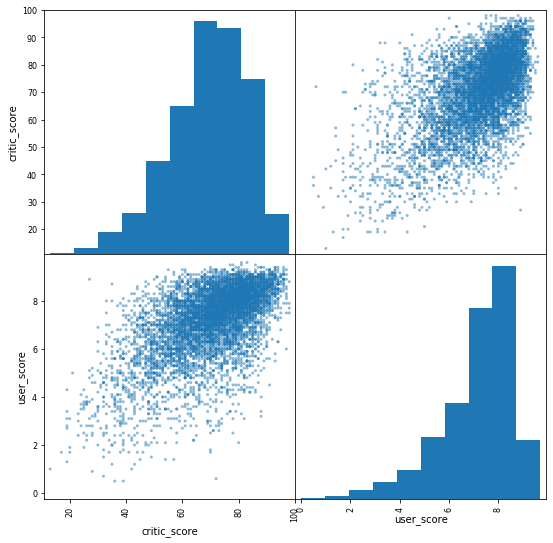

In [39]:
pd.plotting.scatter_matrix(df[['critic_score', 'user_score']], figsize=(9,9));

Распределения близкие к нормальному. Корреляция средне выраженная.

Во всех рассмотренных случаях мы получили либо очень слабую, либо просто слабую корреляцию между рассмотренными признаками и оценкой пользователей. Среднюю кореляцию удалось получить только между оценками пользователей и оценками критиков:
* минимальная 'продажив в Европе игры VS оценка пользователей': 0.055..
* максимальная 'оценка критиков VS оценка пользователей': 0.579..

Ни по одному из исследуемых признаков мы не получили высокой или очень высокой корреляции. Поэтому осреднять оценки пользователей по одному из этих критериев для заполнения пропусков данных не представляется уместным.

**Обработка пропусков данных в столбце 'rating'**

Так как rating является номинативной переменной, наиболее разумным будет заменить пропущеные значения на 'unknown'

In [40]:
# замена пропущенных значений в столбце 'rating' на строку 'unknown' специальным методом замены
df['rating'] = df['rating'].fillna('unknown')

In [41]:
# <проверка: вычисление суммарного количества пропусков, выявленных в таблице df>
df.isnull().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8466
user_score         8988
rating                0
global_sales          0
dtype: int64

После обработки пропусков, пропущенные значения остались в столбцах critic_score и user_score. Данных для того, чтобы восстановить эти пропуски, у нас недостаточно. Также мы видим, что пропуски в столбцах часто встречаются вместе, т.е. нет данных по одним и тем же играм. Это с большой долей вероятности связано с тем, что эти данные просто не были загружены в таблицу. После написания кратких выводов можно переходить к следующему этапу.

**Выводы**

На данном этапе были проведены замены названий столбцов на более удобные для дальнейшей работы, а также проведена работа по поиску и замене пропущенных значений.

Нам встретились пропущенные значения в столбцах name, year_of_release, critic_score, user_score и rating. 

В столбце name было всего два пропуска, что не является критичным и может быть вызвано случайностью.  

В столбце year_of_release количество пропусков также не было существено, часть значений удалось восстановить, взяв информацию непосредственно из названия игр, остальные данные были опущены, из-за их малого количества и не возможности повлиять на исследование в целом.  

Пропуски значений critic_score и user_score составляют порядка половины данных и часто встречаются вместе. С большой вероятностью это говорит нам о том, что оценки для части игр не были выставлены или же просто не были загружены в таблицу. Была принята попытка восстановить пропущенные значения, найдя корреляцию с объемами продаж, однако, в результате корреляции оказались слабыми или очень слабыми. В итоге, пропуски решено было оставить, чтобы не искажать результаты исследования. Лучше работать с меньшим количеством данных, но хорошего качества.

Пропуски значений рейтинга игр были заменены на строку 'unknown', т.к. это номинативная переменная и не представляется возможным произвести оценку ее действительных значений для той или иной игры.

Заметная часть отсутствующих оценок и рейтингов была связана с годом релиза игры. Либо это 1980-ые годы, когда индустрия видео-игр не была столь развита, поэтому пропуски оценок и рейтингов кажутся логичными, либо это наиболее новые игры, которые еще не успели агрегировать оценки критиков и пользователей (включая, более 2000 строковых значений 'tbc').  

Так же были посчитаны суммарные продажи во всех регионах с последующим сохранением значений в отдельный столбец 'global_sales'.  

Данные подготовлены к дальнейшему анализу.


## Этап 3. Исследовательский анализ данных

Рассмотрим распределение игр по годам выпуска, оценим популярность игровых платформ в те или иные периоды времени, отберем актуальные данные для дальнейшей работы, построения прогнозов и выводов.

**Распределение игр по годам выпуска**

Посмотрим, сколько игр выпускалось в разные годы.

In [42]:
# группировка данных и подсчет количества выпущенных игр по годам
games_per_year = df.groupby('year_of_release', as_index=False).name \
                   .count() \
                   .rename(columns={'name': 'games_number'})

Построим столбчатую диаграму распределения количества выпущенных игр по годам.

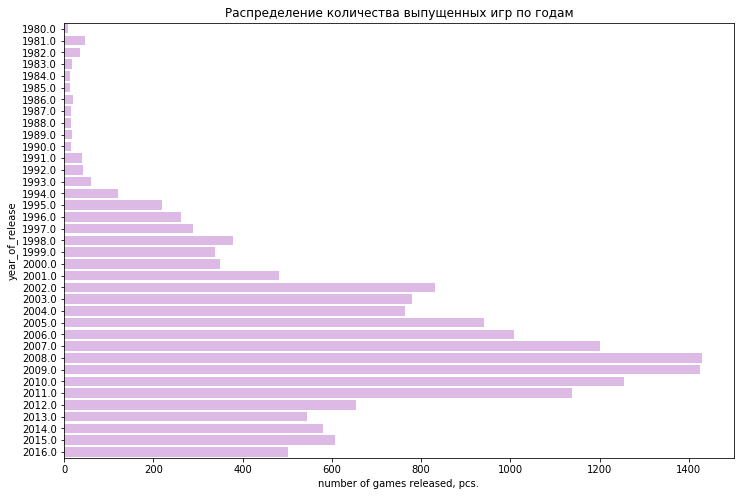

In [43]:
# размер фигуры
plt.figure(figsize=(12, 8))

# задание параметров построения графика
ax = sns.barplot(y=games_per_year.year_of_release,
                 x=games_per_year.games_number,
                 orient='h',
                 color='#e2b2ed'
                 );

# подписи осей и названия
plt.xlabel('number of games released, pcs.')
plt.title('Распределение количества выпущенных игр по годам');

По графику видно, что основной объем игр был выпущен в первое десятилетие двадцать первого века с пиком в 2008-2009 годах. После 2011 года наблюдается значительный спад количества выпущенных игр (рост популярности социальных сетей?).

Оценим накопительный процент количества вышедших игр

In [44]:
# подсчитываем процентное соотношение для конкретного года
games_per_year['prcnt'] = 100 * games_per_year.games_number / games_per_year.games_number.sum()
# подсчитываем накопительный процент
games_per_year['prcnt_sum'] = games_per_year.prcnt.expanding(1).sum()

# визуализация результатов
games_per_year

,year_of_release,games_number,prcnt,prcnt_sum
0,1980.0,9,0.054665,0.054665
1,1981.0,46,0.279397,0.334062
2,1982.0,36,0.218659,0.552721
3,1983.0,17,0.103256,0.655977
4,1984.0,14,0.085034,0.741011
5,1985.0,14,0.085034,0.826045
6,1986.0,21,0.127551,0.953596
7,1987.0,16,0.097182,1.050777
8,1988.0,15,0.091108,1.141885
9,1989.0,17,0.103256,1.245141


Построение накопительой диаграммы процента выпущенных игр.

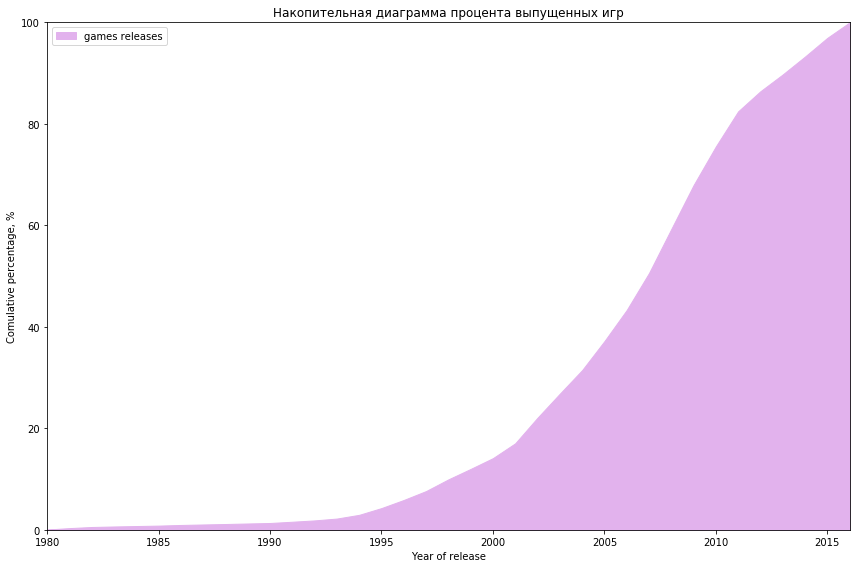

In [45]:
# преобразование данных
rnd = np.asarray(games_per_year.loc[:, 'prcnt_sum'].to_list())
yrs = np.asarray(games_per_year.loc[:, 'year_of_release'].to_list())

# построение и оформление графика
fig, ax = plt.subplots(figsize=(12, 8))
ax.stackplot(yrs, rnd, labels=['games releases'], color='#e2b2ed')
ax.set_title('Накопительная диаграмма процента выпущенных игр')
ax.legend(loc='upper left')
ax.set_xlabel('Year of release')
ax.set_ylabel('Comulative percentage, %')
ax.set_xlim(xmin=yrs[0], xmax=yrs[-1])
ax.set_ylim(ymin=0, ymax=100)
fig.tight_layout()
 
plt.show();

По полученным данным хорошо видно, что за первую половину представленного периода (с 1983 по 1999 год) было выпущено порядка 11% от общего количества вышедших игр, а за вторую половину, оставшиеся 89%. Половина вышедших игр была выпущена в период с 2007 по 2016 годы. Таким образом, можно сделать вывод, что данные за 80-ые и 90-ые годы двадцатого века не имеют большого веса в количественном значении для имеющегося набора данных.

Посмотрим на динамику общих продаж.

In [46]:
# получаем необходимый срез данных
df_sales = df.groupby('year_of_release', as_index=False) \
    .agg({'global_sales': 'sum'}) \
    .sort_values('global_sales', ascending=False)

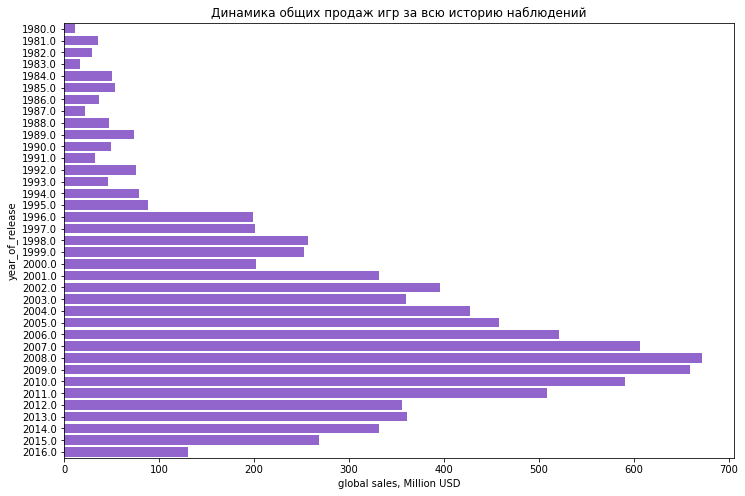

In [47]:
# размер фигуры
plt.figure(figsize=(12, 8))

# задание параметров построения графика
ax = sns.barplot(y=df_sales.year_of_release,
                 x=df_sales.global_sales,
                 orient='h',
                 color='#9054DE');

# подписи осей и названия
plt.xlabel('global sales, Million USD')
plt.title('Динамика общих продаж игр за всю историю наблюдений');

Динамика общих продаж в целом хорошо повторяет динамику выхода новых игр, с пиком, приходящимся на 2008-2009 годы и с последующим спадом до значений начала двухтысячных годов, когда отрасль компьютерных игр была в начале подъема.

Далее рассмотрим распределение продаж по платформам. Определим модные в прошлом и популярные сейчас платформы. Оценим жизненный цикл платформ.

**Изменение продаж по платформам**

In [48]:
# подсчет продаж с группировкой по платформам
plt_sales = df.groupby('platform', as_index=False).agg({'global_sales': 'sum'}) \
    .sort_values('global_sales', ascending=False)

# вывод результата
plt_sales

,platform,global_sales
16,PS2,1247.28
28,X360,961.88
17,PS3,931.34
26,Wii,892.37
4,DS,802.79
15,PS,729.04
18,PS4,314.14
6,GBA,312.88
19,PSP,290.38
2,3DS,257.81


<Figure size 864x576 with 0 Axes>

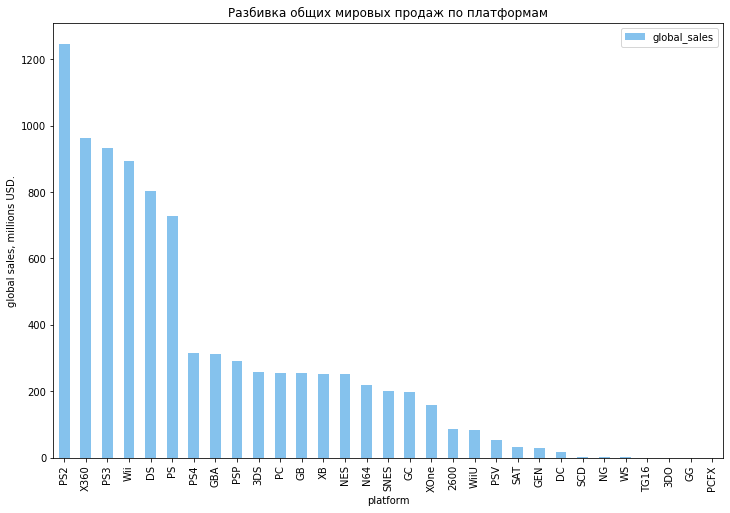

In [49]:
# размер фигуры
plt.figure(figsize=(12, 8))

# задание параметров построения графика
plt_sales.plot(x='platform',
               y='global_sales',
               kind='bar',
               figsize=(12, 8),
               title='Разбивка общих мировых продаж по платформам',
               color='#85c2ed');

# задание подписи оси у
plt.ylabel('global sales, millions USD.');

На графике отчетливо видны лидеры по общим мировым продажам: PS2, X360, PS3, Wii, DS, PS. Наблюдается отрыв в 2-4 раза по сравнению со следующей по выручке платформой PS4. Данные топ-6 платформ главный претендент для детального дальнейшего анализа. Однако, предварительно необходимо проверить актуальность тех или иных платформ.	

Для оценки динамики популярности платформ по годам отберем платформы суммарные продажи которых превышают медианное значение, т.е. возьмем первую половину ранжированного по объемам мировых продаж списка.

In [50]:
# создадим список названий платформ с общими мировыми продажами больше медианного значения
platforms_above_median = []

for row in plt_sales.itertuples():  # итерируемся по датафрейму
    if row.global_sales > plt_sales.global_sales.median():  # сравниваем значения продаж с медианой
        platforms_above_median.append(row.platform)  # добавляем название платформы в список

# проверка результата (вывод списка названий платформ)
platforms_above_median

['PS2',
 'X360',
 'PS3',
 'Wii',
 'DS',
 'PS',
 'PS4',
 'GBA',
 'PSP',
 '3DS',
 'PC',
 'GB',
 'XB',
 'NES',
 'N64']

In [51]:
# группировка данных по годам и платформам и подсчет суммарных мировых продаж
plt_sales_year = df.query('platform in @platforms_above_median') \
    .groupby(['year_of_release', 'platform'], as_index=False) \
    .agg({'global_sales': 'sum'}) \
    .sort_values('year_of_release', ascending=True)

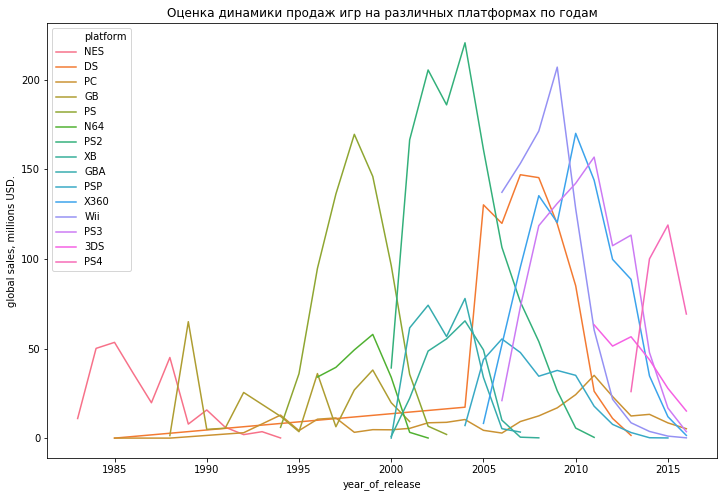

In [52]:
# размер фигуры
plt.figure(figsize=(12, 8))

# параметры графика
sns.lineplot(x=plt_sales_year.year_of_release,
             y=plt_sales_year.global_sales,
             hue=plt_sales_year.platform);

# задание подписи оси у
plt.ylabel('global sales, millions USD.');
plt.title('Оценка динамики продаж игр на различных платформах по годам');

Построим график распределения жизненного цикла платформ. Рассмотрим основные статистики получившегося показателя.

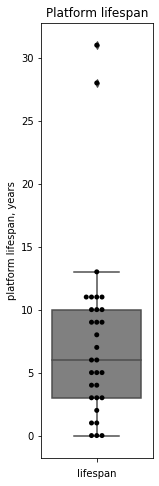

In [53]:
# вычисляем продолжительность жизни платформы
life_span = df.groupby('platform').year_of_release.max() - df.groupby('platform').year_of_release.min()

# размечаем пространство для вывода графиков
fig, (ax1) = plt.subplots(
    nrows=1, ncols=1,
    figsize=(2, 8)
)

# построение и оформление графика (боксплот + точки значений (swarmplot))
sns.boxplot(y=life_span, color='grey', ax=ax1)
sns.swarmplot(y=life_span, color='black')

# подписи осей и  название графика
ax1.set_title('Platform lifespan')
ax1.set_xlabel('lifespan')
ax1.set_ylabel('platform lifespan, years');

По графику видно, что присутствуют два выброса, в остальном, большая часть данных помещается внутрь межквартильного размаха. Из-за наличия выбросов будем использовать медианное значение (6 лет), когда мы говорим о среднем значении жизненного цикла платформы.

In [54]:
# основные статистики продолжительности жизненного цикла платформ
life_span.describe()

count    31.000000
mean      7.612903
std       6.998464
min       0.000000
25%       3.000000
50%       6.000000
75%      10.000000
max      31.000000
Name: year_of_release, dtype: float64

По полученным графикам хорошо видно, что средний цикл жизни платформы составляет 6 лет (исключением является только PC и DS). Такжы мы видим, что общий лидер по продажам PS2 уже полностью исчерпала себя и ее последние продажи были в 2011 году. Поэтому отбирать данные по размеру продаж за всю историю будет некорректно для наших задач. Мы таким образом сильно исказим результаты наших исследований. Поэтому примем другой критерий для нашей выборки: возьмем половину значения третьего квартиля (5 лет). Таким образом, в нашу выборку попадут как платформы на пике популярности, так и новые зарождающиеся платформы, которые будут популярны в будущем.

In [55]:
# группировка данных платформ за последние 5 лет по годам и платформам и подсчет суммарных мировых продаж
plt_sales_5year = df.query('year_of_release > 2011') \
    .groupby(['year_of_release', 'platform'], as_index=False) \
    .agg({'global_sales': 'sum'}) \
    .sort_values('year_of_release', ascending=True)

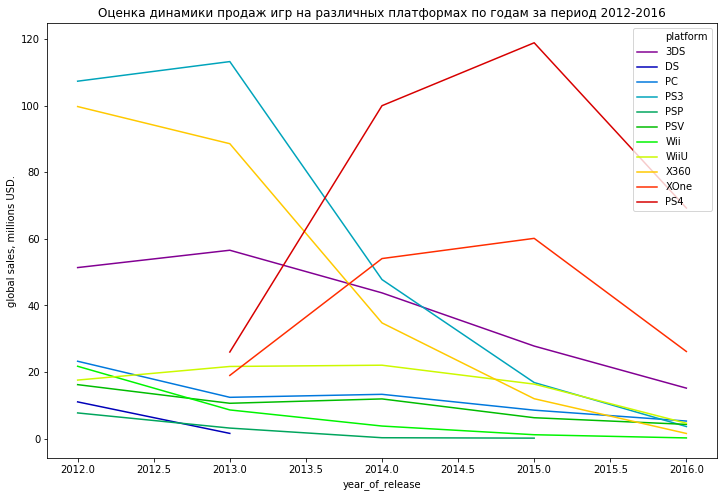

In [56]:
# размер фигуры
plt.figure(figsize=(12, 8))

# параметры графика
sns.lineplot(x=plt_sales_5year.year_of_release,
             y=plt_sales_5year.global_sales,
             hue=plt_sales_5year.platform,
             legend='full',
             palette='nipy_spectral');

# задание подписи оси у
plt.ylabel('global sales, millions USD.');
plt.title('Оценка динамики продаж игр на различных платформах по годам за период 2012-2016');

Учитывая что у нас данные за 2016 год не полные, то сделав на это поправку, с помощью графика выше мы можем сказать что на данный момент по прежнему растущими и перспективными являются только две платформы: PS4 и XOne. Остатки популярности имеются у 3DS. Продажи игр на остальных платфорах незначительны или стремятся к нулю. Поэтому на данном этапе исследования дальше будем работать именно с этими тремя платформами: PS4, XOne, 3DS.

**Дальнейшее исследование платформ PS4, XOne, 3DS**

Сделаем срез датафрейма, куда попадут данные за последние 5 лет только для трех выбранных платформ по результатам предыдущего шага. Посмотрим детальней на разбивку продаж по платформам.

In [57]:
# список названий трех наиболее актуальных платформ
popular_platforms = ['PS4', 'XOne', '3DS']

# делаем выборку по названию платформ и году
df_3p = df.query('platform in @popular_platforms & year_of_release > 2011') \
          .reset_index(drop=True)

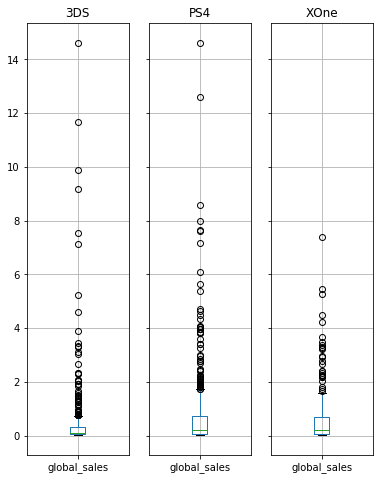

In [58]:
# построение графика типа боксплот (глобальные продажи с разбивкой по платформам)
df_3p.groupby(['platform']).boxplot(column='global_sales',
                                    figsize=(6, 8),
                                    layout=(1, 3));

Дополнительно получим основные статистические показатели нашего среза

In [59]:
# получение описательных статистик
df_3p.groupby(['platform']).global_sales.describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,396.0,0.491439,1.387161,0.01,0.04,0.11,0.3125,14.60
PS4,392.0,0.801378,1.609456,0.01,0.06,0.20,0.7300,14.63
XOne,247.0,0.645020,1.036139,0.01,0.06,0.22,0.6850,7.39


По полученном графику можем наблюдать, что средние значения для всех платформ примерно одинаковые. Так же мы можем сказать по наличию большого количества выбросов на графиках всех платформ, что основную выручку приносят небольшое количество игры-хитов. Их продажи в 11-20 раз превосходят средние значения общих продаж. Причем таких игр-хитов как по суммарному количеству, так и по амплитуде наблюдаемого эффекта больше на платформах 3DS и PS4.

Найдем игру с максимальными мировыми продажами для каждой из платформ.

In [60]:
# отбираем индексы
df_3p.groupby(['platform']).global_sales.idxmax()

platform
3DS      1
PS4      0
XOne    11
Name: global_sales, dtype: int64

In [61]:
# выводим наиболее продаваемые игры по отобранным индексам
df_3p.iloc[[1, 0, 11]]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,global_sales
1,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown,14.60
0,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
11,Call of Duty: Black Ops 3,XOne,2015.0,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,unknown,7.39


Для платформ PS4 и XOne наиболее продаваемой игрой стала 'Call of Duty: Black Ops 3 (2015)' в то время как для 3DS такой игрой является 'Pokemon X/Pokemon Y' 2013 года выпуска, что подтверждает тезис о снижении со временем популярности данной платформы.

Посмотрим, как влияют на продажи внутри одной популярной платформы
отзывы пользователей и критиков. Построим диаграммы рассеивания и посчитаем коэффициенты корреляции между отзывами и продажами.

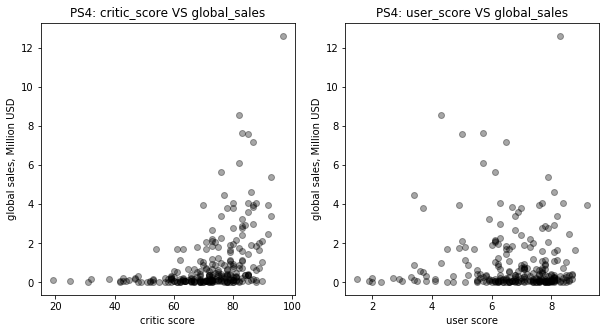

In [62]:
# делаем срез данных по названию платформы
df_ps4 = df_3p.query('platform == "PS4"')

# размечаем пространство для вывода графиков
fig, (ax1, ax2) = plt.subplots(
    nrows=1, ncols=2,
    figsize=(10, 5)
)

# построение и оформление графика рассеивания для отзывов критиков
ax1.scatter(x=df_ps4.critic_score,
            y=df_ps4.global_sales,
            alpha=0.35,
            color='black');
ax1.set_title('PS4: critic_score VS global_sales')
ax1.set_xlabel('critic score')
ax1.set_ylabel('global sales, Million USD')

# построение и оформление графика рассеивания для отзывов пользователей
ax2.scatter(x=df_ps4.user_score,
            y=df_ps4.global_sales,
            alpha=0.35,
            color='black');
ax2.set_title('PS4: user_score VS global_sales')
ax2.set_xlabel('user score')
ax2.set_ylabel('global sales, Million USD');

In [63]:
# Подсчет и вывод на экран коэффициентов корреляции
print('PS4:')
print('Коэффициент корреляции глобальных продаж и оценки критиков:', round(df_ps4['global_sales'].corr(df_ps4['critic_score']), 3))
print('Коэффициент корреляции глобальных продаж и оценки пользователей:', round(df_ps4['global_sales'].corr(df_ps4['user_score']), 3))

PS4:
Коэффициент корреляции глобальных продаж и оценки критиков: 0.407
Коэффициент корреляции глобальных продаж и оценки пользователей: -0.032


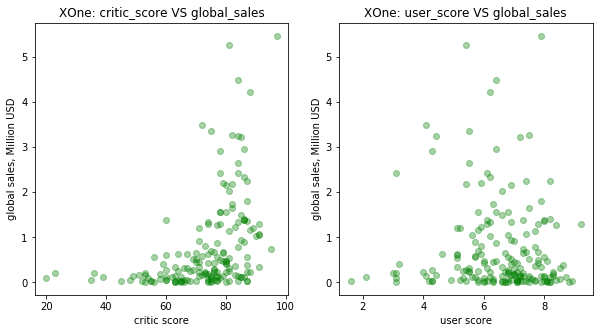

In [64]:
# делаем срез данных по названию платформы
df_xone = df_3p.query('platform == "XOne"')

# размечаем пространство для вывода графиков
fig, (ax1, ax2) = plt.subplots(
    nrows=1, ncols=2,
    figsize=(10, 5)
)

# построение и оформление графика рассеивания для отзывов критиков
ax1.scatter(x=df_xone.critic_score,
            y=df_xone.global_sales,
            alpha=0.35,
            color='green');
ax1.set_title('XOne: critic_score VS global_sales')
ax1.set_xlabel('critic score')
ax1.set_ylabel('global sales, Million USD')

# построение и оформление графика рассеивания для отзывов пользователей
ax2.scatter(x=df_xone.user_score,
            y=df_xone.global_sales,
            alpha=0.35,
            color='green');
ax2.set_title('XOne: user_score VS global_sales')
ax2.set_xlabel('user score')
ax2.set_ylabel('global sales, Million USD');

In [65]:
# Подсчет и вывод на экран коэффициентов корреляции
print('XOne:')
print('Коэффициент корреляции глобальных продаж и оценки критиков:', round(df_xone['global_sales'].corr(df_xone['critic_score']), 3))
print('Коэффициент корреляции глобальных продаж и оценки пользователей:', round(df_xone['global_sales'].corr(df_xone['user_score']), 3))

XOne:
Коэффициент корреляции глобальных продаж и оценки критиков: 0.417
Коэффициент корреляции глобальных продаж и оценки пользователей: -0.069


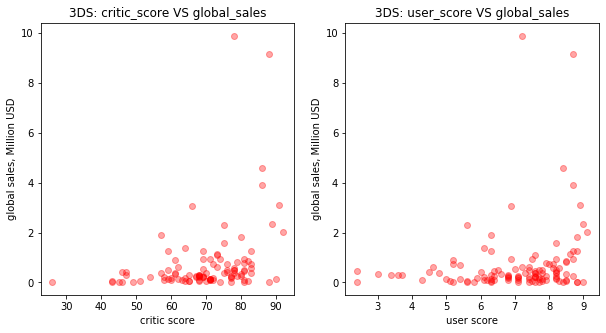

In [66]:
# делаем срез данных по названию платформы
df_3ds = df_3p.query('platform == "3DS"')

# размечаем пространство для вывода графиков
fig, (ax1, ax2) = plt.subplots(
    nrows=1, ncols=2,
    figsize=(10, 5)
)

# построение и оформление графика рассеивания для отзывов критиков
ax1.scatter(x=df_3ds.critic_score,
            y=df_3ds.global_sales,
            alpha=0.35,
            color='red');
ax1.set_title('3DS: critic_score VS global_sales')
ax1.set_xlabel('critic score')
ax1.set_ylabel('global sales, Million USD')

# построение и оформление графика рассеивания для отзывов пользователей
ax2.scatter(x=df_3ds.user_score,
            y=df_3ds.global_sales,
            alpha=0.35,
            color='red');
ax2.set_title('3DS: user_score VS global_sales')
ax2.set_xlabel('user score')
ax2.set_ylabel('global sales, Million USD');

In [67]:
# Подсчет и вывод на экран коэффициентов корреляции
print('3DS:')
print('Коэффициент корреляции глобальных продаж и оценки критиков:', round(df_3ds['global_sales'].corr(df_3ds['critic_score']), 3))
print('Коэффициент корреляции глобальных продаж и оценки пользователей:', round(df_3ds['global_sales'].corr(df_3ds['user_score']), 3))

3DS:
Коэффициент корреляции глобальных продаж и оценки критиков: 0.321
Коэффициент корреляции глобальных продаж и оценки пользователей: 0.198


Корреляция между продажами--оценками критиков слабая. Корреляция между продажами оценками--пользователей очень слабая, практически равная нулю для PS4 и XOne. Данные выводы совпадают для всех трех рассмотренных платформ. Корреляция между продажами и оценками критиков для PS4 и XOne (порядка 0.41), а для 3DS (порядка 0.32).

Дальше посмотрим на общее распределение игр по жанрам для отобранных ранее данных (платформы PS4, XOne, 3DS; данные, начиная с 2012 года).

In [68]:
# групировка по жанрам, сортировка и выборка данных
genres_sales_all = df_3p.groupby(['genre'], as_index=False).agg({'global_sales': 'sum'}).sort_values('global_sales', ascending=False)

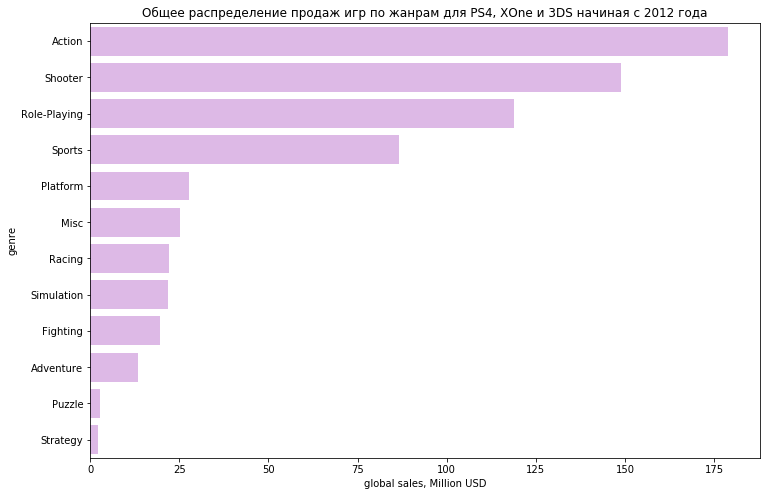

In [69]:
# размер фигуры
plt.figure(figsize=(12, 8))

# задание параметров построения графика
ax = sns.barplot(y=genres_sales_all.genre,
                 x=genres_sales_all.global_sales,
                 orient='h',
                 color='#e2b2ed',
                 ci=None);

# подписи осей и названия
plt.xlabel('global sales, Million USD')
plt.title('Общее распределение продаж игр по жанрам для PS4, XOne и 3DS начиная с 2012 года');

Наиболее популярны жанры Action, Shooter и Role-Playing. Четвертое место занимает жанр Sports. Продажи по остальным играм отличаются в разы. Продажи игр самых не популярных жанров (Puzzle и Strategy) отличаются в десятки раз по сравнению с остальными жанрами.

Посмотрим популярность жанров с разбиением по платформам.

In [70]:
# групировка по жанрам и платформам, сортировка и выборка данных
genres_sales = df_3p.groupby(['genre', 'platform'], as_index=False).agg({'global_sales': 'sum'}).sort_values('global_sales', ascending=False)

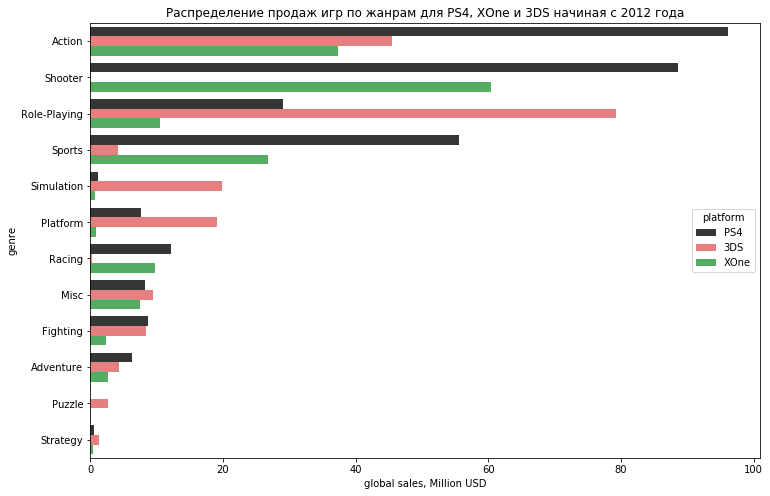

In [71]:
# размер фигуры
plt.figure(figsize=(12, 8))

# задание параметров построения графика
ax = sns.barplot(y=genres_sales.genre,
                 x=genres_sales.global_sales,
                 orient='h',
                 color='#6925c2',
                 palette=['#363636', '#f76f6f', '#49ba5a'],
                 hue=genres_sales.platform,
                 hue_order=['PS4', '3DS', 'XOne']
                 );

# подписи осей и названия
plt.xlabel('global sales, Million USD')
plt.title('Распределение продаж игр по жанрам для PS4, XOne и 3DS начиная с 2012 года');

Интересно отметить, что по жанровым предпочтениям сильно выделяется платформа 3DS. Например, жанр Shooter на ней вовсе не популярен, в то время, как Role-Playing занимает первое место с большим отрывом. Жанр Sports (4 место в общем рейтинге) наиболее популярен среди пользователей PS4.

**Выводы**

На данном этапе был проведен исследовательский анализ данных. 
Определно количество игр выпускаемых в различные периоды (половина представленных игр была выпущена с 2007 по 2016 годы).  

Отмечен средний жизненный цикл популярности игровых платформ (порядка 6 лет). 

Выявлены три наиболее актуальные платформы на данный момент и в разрезе перспективы на следующие несколько лет (PS3, XOne, 3DS). 
Определена корреляция между оценками критиков и оценками пользователей. В целом оценки критиков слабо коррелируются с продажами, а оценки пользователй и продажи имеют очень слабую корреляцию (практически нулевую).

Найдены наиболее популярные жанры игр за последние 5 лет (Action, Shooter и Role-Playing). Получена разбивка популярности жанров по платформам (предпочтения пользователей платформы 3DS выделяются на фоне других пользователей: например, таким пользователям совсем не интересен жанр игр Shooter, более чем популярный на других платформах). 

Также было отмечено, что большую часть общей выручки генерирует незначительное количество игр-хитов. Продажи которых в десятки раз превышают продажи среднестатистических по меркам общих мировых продаж игр.

## Этап 4. Портрет пользователя каждого региона

Определим для пользователя каждого региона наиболее популярные платформы, наиболее популярные жанры, а также влияние рейтинга ESRB на продажи по регионам.

Возьмем наиболее актуальные данные, сделав выборку за последние 5 лет (начиная с 2012 года).

In [72]:
# отбираем данные за последние пять лет
df_4 = df[df['year_of_release'] > 2011].reset_index(drop=True)

**Определим популярность платформ по регионам.**

In [73]:
# получаем необходимый срез данных
df_4_region = df_4[['platform', 'na_sales', 'eu_sales', 'jp_sales']] \
    .groupby('platform', as_index=False) \
    .agg({'na_sales': 'sum', 'eu_sales': 'sum', 'jp_sales': 'sum'}) \
    .melt(id_vars=['platform']) \
    .sort_values('value', ascending=False)

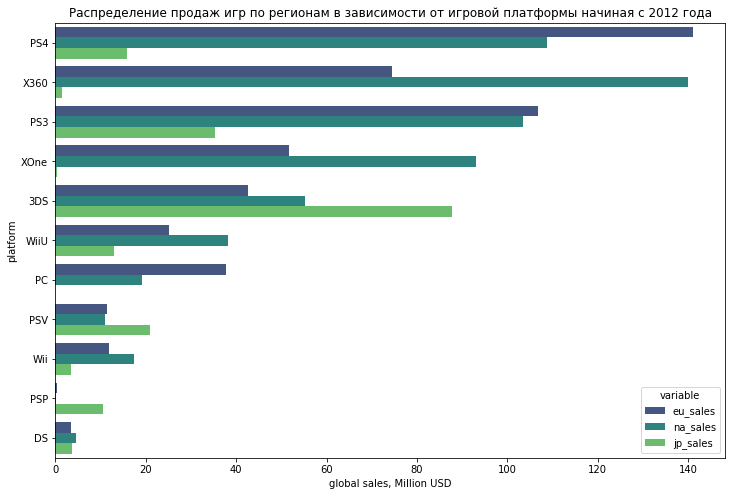

In [74]:
# размер фигуры
plt.figure(figsize=(12, 8))

# задание параметров построения графика
ax = sns.barplot(y=df_4_region.platform,
                 x=df_4_region.value,
                 orient='h',
                 color='#6925c2',
                 palette='viridis',
                 hue=df_4_region.variable);

# подписи осей и названия
plt.xlabel('global sales, Million USD')
plt.title('Распределение продаж игр по регионам в зависимости от игровой платформы начиная с 2012 года');

Список Топ-5 платформ выглядит следующим образом:
1. PS4
2. X360
3. PS3
4. XOne
5. 3DS

Отметим, что на Европейском рынке наиболее популярны платформы производителя Sony (PS4, PS3), в то время как в Северной Америке наибольшей популярностью пользуются игровые консоли Microsoft (X360 и ее последователь XOne). В Японии же самой популярной платформой является 3DS производства местной компании Nintendo.

**Определим самые популярные жанры игр по регионам.**

In [75]:
# получаем необходимый срез данных
df_4_genre = df_4[['genre', 'na_sales', 'eu_sales', 'jp_sales']] \
    .groupby('genre', as_index=False) \
    .agg({'na_sales': 'sum', 'eu_sales': 'sum', 'jp_sales': 'sum'}) \
    .melt(id_vars=['genre']) \
    .sort_values('value', ascending=False)

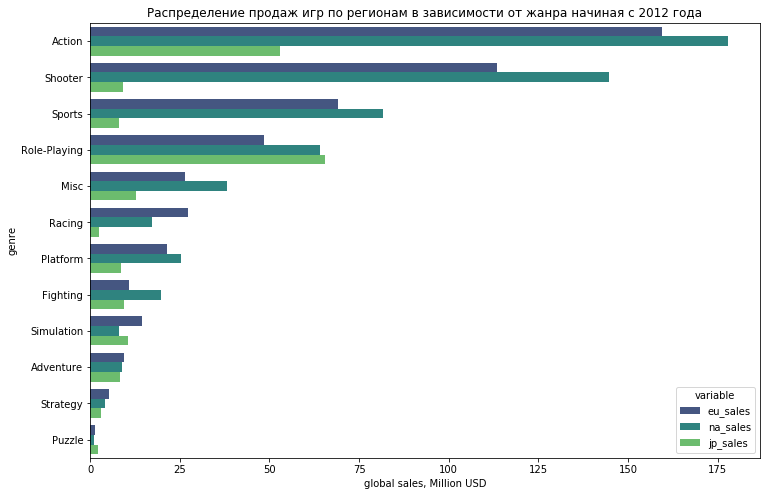

In [76]:
# размер фигуры
plt.figure(figsize=(12, 8))

# задание параметров построения графика
ax = sns.barplot(y=df_4_genre.genre,
                 x=df_4_genre.value,
                 orient='h',
                 color='#6925c2',
                 palette='viridis',
                 hue=df_4_genre.variable,
                 hue_order=['eu_sales', 'na_sales', 'jp_sales']);

# подписи осей и названия
plt.xlabel('global sales, Million USD')
plt.title('Распределение продаж игр по регионам в зависимости от жанра начиная с 2012 года');

Список Топ-5 наиболее популярных жанров:
1. Action
2. Shooter
3. Sports
4. Role-Playing
5. Misc

Отметим, что в Японии шутеры имеют значительно меньшую популярность в сравнении с Европой и Северной Америкой. На Японском архипелаге наибольшей популярностью обладают жанры Role-Playing и Action. 
Также стоит отметить, что суммарный объем продаж игр всех жанров в Северной Америке и Европе примерно сопоставим, в то время как на азиатском рынке он меньше более чем в два раза.

**Рассмотрим влияние рейтинга ESRB на продажи в отдельном регионе**

In [77]:
# получаем необходимый срез данных
df_4_rating = df_4[['rating', 'na_sales', 'eu_sales', 'jp_sales']] \
    .groupby('rating', as_index=False) \
    .agg({'na_sales': 'sum', 'eu_sales': 'sum', 'jp_sales': 'sum'}) \
    .melt(id_vars=['rating']) \
    .sort_values('value', ascending=False)

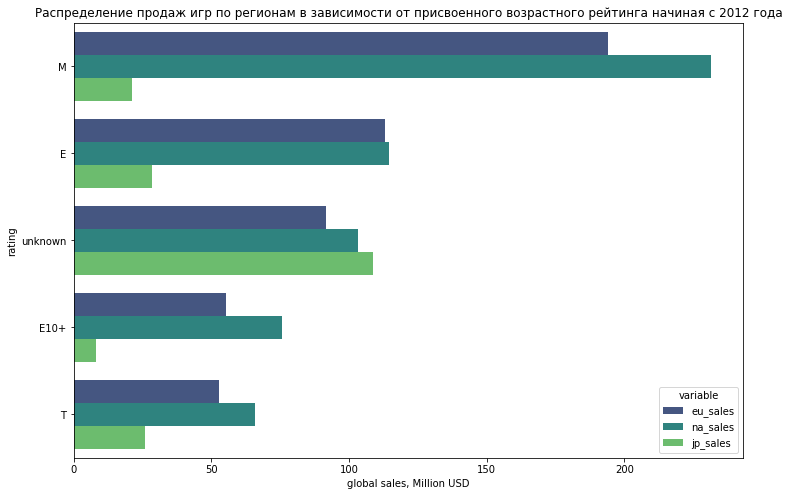

In [78]:
# размер фигуры
plt.figure(figsize=(12, 8))

# задание параметров построения графика
ax = sns.barplot(y=df_4_rating.rating,
                 x=df_4_rating.value,
                 orient='h',
                 color='#6925c2',
                 palette='viridis',
                 hue=df_4_rating.variable,
                 hue_order=['eu_sales', 'na_sales', 'jp_sales']);

# подписи осей и названия
plt.xlabel('global sales, Million USD')
plt.title('Распределение продаж игр по регионам в зависимости от присвоенного возрастного рейтинга начиная с 2012 года');

Игры, получившие возрастной рейтинг M (контент пригодный для лиц старше 16 лет) в два раза популярнее остальных категорий рейтинга на рынках Европы и Северной Америки. Остальные категории игр распределены относительно равномерно на этих рынках. В Японии же наибольшей популярностью, также превышающей в два раза преследователей, обладают игры возрастной рейтинг которых нам неизвестен ('unknown'). В первую очередь это может быть связано не столько с предпочтениями пользователей, а с тем, что организатор рейтинга (ESRB, Location: New York City, New York, U.S) не уделяет должного внимания играм выходящим локально на азиатском рынке.

**Выводы**

После проведенного анализа можем заключить, что портрет пользователя регионов Северная Америка и Европа не сильно различается, в то время, как азиатские потребители выделяются по проанализированным параметрам (выбор платформы, любимый жанр, ситуация с рейтингом наиболее продаваемых игра). Следовательно стоит учитывать историко-культурные различия регионов, отражающиеся непосредственно в предпочтениях пользоватлей, при ведении бизнеса.

## Этап 5. Исследование статистических показателей

На этом этапе более детально изучим пользовательский рейтинг и рейтинг критиков. Исследуем статистические показатели.

Возьмем срез данных, использовавшийся на предыдущем этапе (данные за последние 5 лет (начиная с 2012 года).

In [79]:
# получаем необходимый срез данных, приведя critic_score к размерности user_score делением на 10
df_5 = df_4.assign(critic_score= lambda x: x.critic_score / 10) \
    .groupby('genre', as_index=False)\
    .agg({'critic_score': 'mean', 'user_score': 'mean'}) \
    .melt(id_vars=['genre']) \
    .sort_values('value', ascending=False)

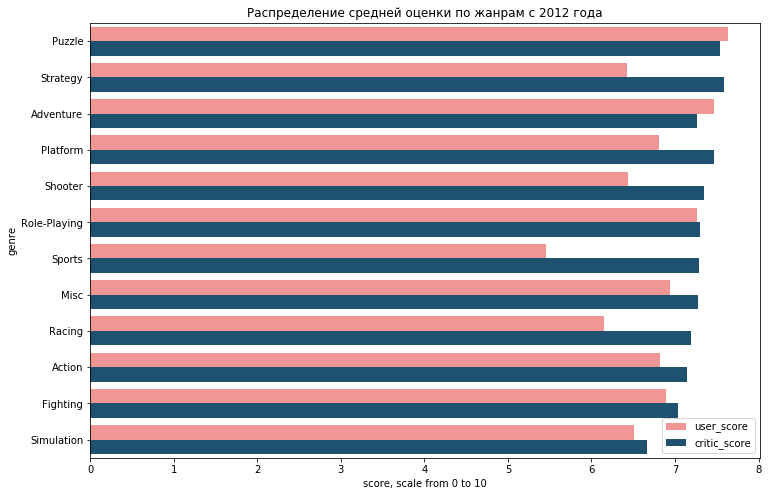

In [80]:
# размер фигуры
plt.figure(figsize=(12, 8))

# задание параметров построения графика
ax = sns.barplot(y=df_5.genre,
                 x=df_5.value,
                 orient='h',
                 color='#6925c2',
                 palette=['#FF8785', '#10567E'],
                 hue=df_5.variable);

# подписи осей и названия
ax.legend(loc = 'best')
plt.xlabel('score, scale from 0 to 10')
plt.title('Распределение средней оценки по жанрам с 2012 года');

В большей части случаев оценки критиков и пользователей достаточно хорошо совпадают. В особенности для жанров Puzzle и Role-Playing.  
Наибольшие расхождения в оценках между критиками и пользователями наблюдаются для жанров Sports и Racing (в обеих случаях критики более благосклонны к играм, в сравнении с пользователями).  
Самую высокую среднюю оценку критиков имеют жанры Strategy, Platform и Puzzle.   
Инересно отметить, что для всех жанров средняя оценка критиков почти всегда больше средней оценки пользователей (исключения: Puzzle и Adventure).

Посмотрим на форму распределения оценок критиков и пользователей.

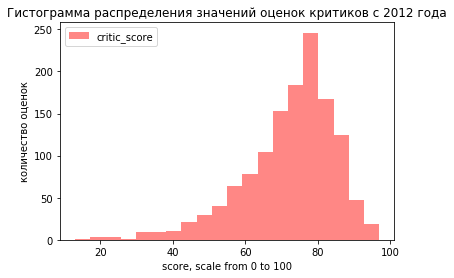

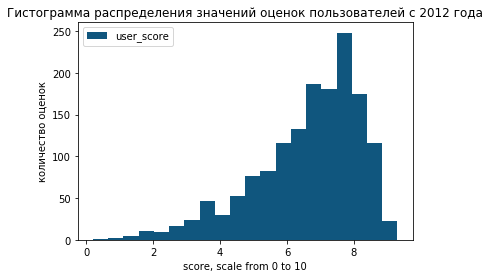

In [81]:
# построение гистограммы для оценок критиков
df_4.plot(y='critic_score',
          kind='hist',
          bins=20,
          color='#FF8785')

# подписи осей и названия
plt.legend(loc = 'upper left')
plt.xlabel('score, scale from 0 to 100')
plt.ylabel('количество оценок')
plt.title('Гистограмма распределения значений оценок критиков с 2012 года');


# построение гистограммы для оценок пользователей
df_4.plot(y='user_score',
          kind='hist',
          bins=20,
          color='#10567E')

# подписи осей и названия
plt.legend(loc = 'best')
plt.xlabel('score, scale from 0 to 10')
plt.ylabel('количество оценок')
plt.title('Гистограмма распределения значений оценок пользователей с 2012 года');

Оба распределения близкие к нормальному. По своей форме уномодальные и симметричные. Значит в данных нет серьезных ошибок и можно относиться к ним, как к действительно независимым и случайным друг относительно друга. Следовательно в дальнейшем мы можем использовать базовый статистический мат. аппарат для проверки различных гипотез.

Посмотрим распределения основных статистик оценок критиков и пользователей (среднее, дисперсия, стандартное отклонение). 

In [82]:
# подсчет статистик
# зеленым подсвечены максимальные значения по каждому столбцу
# красным подсвечены минимальные значения по каждому столбцу
df_5_wide = df_4.assign(critic_score= lambda x: x.critic_score / 10) \
    .groupby('genre', as_index=False)\
    .agg({'critic_score': ['mean', 'var', 'std'],
          'user_score': ['mean', 'var', 'std']}) \
    .style.highlight_min(axis=0, color='#FFC3C2') \
    .highlight_max(axis=0, color='#D8ECC1')

df_5_wide

**Выводы**

Максимальную среднюю оценку у критиков получили игры жанра Strategy, минимальную игры жанра Simulation. Наибольший разброс оценок среди критиков наблюдается у игр жанра Sports, наименьший у игр Puzzle.  

Максимальную среднюю оценку пользователей получили игры жанра Puzzle, минимальную игры жанра Sports. Наибольший разброс оценок среди пользователей наблюдается у игр жанра Strategy, наименьший у игр Puzzle.     

Возможно в рядах обычных пользователей присутствует группа любителей игр, которые ярко-выраженно негативно относятся к играм жанра Sport и ставят этим играм минимально возможно низкие оценки. Критики же больше основываются не на личных предпочтениях жанров, а на качестве игр вцелом. Этим может объясняться максимальная дельта оценок для игр жанра Sports у критиков и пользователей, а также наибольший разброс оценок (дисперсия и стандартное отклонение) игр жанра Sports среди пользователей, после жанра Strategy.

## Этап 6. Проверка гипотез

**Проверка гипотезы №1.**

Нулевая гипотеза: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.  
Альтернативная гипотеза: средние пользовательские рейтинги платформ Xbox One и PC различаются.

In [83]:
# произведем выборку требующихся для проверки гипотезы данных
sample_1 = np.asarray(df_4.query('platform == "XOne"').user_score.to_list())
sample_2 = np.asarray(df_4.query('platform == "PC"').user_score.to_list())

# убираем NaN значения из наших выборок
sample_1_na = sample_1[~np.isnan(sample_1)]
sample_2_na = sample_2[~np.isnan(sample_2)]

alpha = 0.05  # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

# проверка равенства дисперсий
lv = st.levene(sample_1_na, sample_2_na)
if lv.pvalue > alpha:
    param = True
    print('Обе выборки имеют схожие дисперсии')
else:
    print('Дисперсии выборок различны. Будем использовать equal_var = False')
    param = False

    
# проведение t-test    
results = st.ttest_ind(sample_1_na, sample_2_na, equal_var=param)


print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Дисперсии выборок различны. Будем использовать equal_var = False
p-значение: 0.5489537965134912
Не получилось отвергнуть нулевую гипотезу


Нулевую гипотезу отвергнуть не удалось. Таким образом, у нас имеются сильные основания полагать, что средние показатели рейтинга платформы Xbox One и PC одинаковые.

**Проверка гипотезы №2.**

Нулевая гипотеза: средние пользовательские рейтинги жанров Action и Sports одинаковые.   
Альтернативная гипотеза: средние пользовательские рейтинги жанров Action и Sports различаются.

In [84]:
# произведем выборку требующихся для проверки гипотезы данных
sample_1 = np.asarray(df_4.query('genre == "Action"').user_score.to_list())
sample_2 = np.asarray(df_4.query('genre == "Sports"').user_score.to_list())

# убираем NaN значения из наших выборок
sample_1_na = sample_1[~np.isnan(sample_1)]
sample_2_na = sample_2[~np.isnan(sample_2)]

alpha = 0.05  # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу


# проверка равенства дисперсий
lv = st.levene(sample_1_na, sample_2_na)
if lv.pvalue > alpha:
    param = True
    print('Обе выборки имеют схожие дисперсии')
else:
    print('Дисперсии выборок различны. Будем использовать equal_var = False')
    param = False

    
# проведение t-test    
results = st.ttest_ind(sample_1_na, sample_2_na, equal_var=param)


print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Дисперсии выборок различны. Будем использовать equal_var = False
p-значение: 4.24307776572644e-20
Отвергаем нулевую гипотезу


Нам удалось отвергнуть нулевую гипотезу. Таким образом, у нас имеются сильные основания полагать, что средние пользовательские рейтинги жанров Action и Sports различаются.

**Выводы**

На данном этапе нам удалось проверить две гипотезы о средних пользовательских рейтингах. В результате проверки гипотез, мы теперь можем с большой долей уверенности полагать, что:
* средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* средние пользовательские рейтинги жанров Action и Sports различны.

## Этап 7. Результаты исследования

**Рабочие гипотезы**
* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные.

**Общие выводы**
* половина всех видео игр была выпущена в период с 2007 по 2016 годы;
* пик глобальных продаж выпущенных игр приходился на 2008-2009 годы. На данный момент отрасль видео игр находится в стадии спада;
* жизненный цикл платформы видеоигр составляет порядка 7-10 лет;
* на ближайшее время перспективными являются платформы: PS4, XOne и DS3;
* наиболее популярные жанры игр за последние 5 лет: Action, Shooter и Role-Playing;
* большую часть общей выручки генерирует незначительное количество игр-хитов, продажи которых в десятки раз превышают продажи остальных игр;
* портрет пользователя регионов Северная Америка и Европа не сильно различается по предпочтениям, в то время, как азиатские потребители выделяются, как выбором платформы, так и любимым жанром. Следовательно стоит учитывать историко-культурные различия регионов, отражающиеся непосредственно в предпочтениях пользоватлей, при ведении бизнеса;
* оценки критиков и пользователей имеют среднюю корреляцию и в целом неплохо согласуются между собой;
* в тоже самое время было выяснено, что оценки критиков и оценки пользователей не сильно влияют на динамику продаж (в обоих случаях наблюдается слабая корреляция).
* в результате проверки гипотез нам удалось подтвердить первую гипотезу и опровергнуть вторую.

**Общие рекомендации**
* делать ставку на продажу игр для платформ PS4, XOne и DS3;
* отдавать преимущество играм жанров Action, Shooter и Role-Playing;
* учитывать специфику азиатского рынка при запуска рекламных компаний;
* на дальнюю перспективу подумать о диверсификаци бизнеса и/или иных источниках выручки.